In [1]:
#Import Dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Load CSV and create a dataframe
f = 'Resources\\cancer_dataset.csv'
cancer_df = pd.read_csv(f,encoding = "ISO-8859-1")
cancer_df

,County,State,Cancer_Incidence_Count,Average_Deaths_per_Year,Median_Income,Population_Estimate_2015,Poverty_Rate,Percent_of_Population_Married,Percent_Employed_Over_16,Percent_Unemployed_Over_16,Median_Age,Median_Age_Male,Median_Age_Female,Public_Insurance_%,Private_Insurance_%,Pop_Percent_White,Pop_Percent_Black,Pop_Percent_Asian,Pop_Percent_Other_Race
0,Kitsap County,Washington,1397.000000,469,61898,260131,11.2,52.5,51.9,8.0,39.3,36.9,41.7,32.9,75.1,81.780529,2.594728,4.821857,1.843479
1,Kittitas County,Washington,173.000000,70,48127,43269,18.6,44.5,55.9,7.8,33.0,32.2,33.7,31.1,70.2,89.228509,0.969102,2.246233,3.741352
2,Klickitat County,Washington,102.000000,50,49348,21026,14.6,54.2,45.9,7.0,45.0,44.0,45.8,42.1,63.7,90.922190,0.739673,0.465898,2.747358
3,Lewis County,Washington,427.000000,202,44243,75882,17.1,52.7,48.3,12.1,42.8,42.2,43.4,45.3,58.4,91.744686,0.782626,1.161359,1.362643
4,Lincoln County,Washington,57.000000,26,49955,10321,12.5,57.8,48.2,4.8,48.3,47.8,48.9,44.0,61.6,94.104024,0.270192,0.665830,0.492135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,Ellsworth County,Kansas,1962.667684,15,46961,6343,12.4,51.0,51.7,4.3,44.2,41.1,48.8,31.7,78.3,90.280811,3.837754,0.327613,1.700468
3043,Finney County,Kansas,1962.667684,43,48609,37118,18.8,52.6,70.1,4.6,30.4,29.3,31.4,28.8,64.5,75.706245,2.326771,4.044920,14.130288
3044,Ford County,Kansas,1962.667684,46,51144,34536,15.0,54.8,64.8,6.4,30.9,30.5,31.2,26.6,62.0,87.961629,2.313188,1.316472,5.680705
3045,Franklin County,Kansas,1962.667684,52,50745,25609,13.3,58.8,NaN,6.9,39.0,36.9,40.5,29.5,75.9,92.905681,1.176562,0.244632,2.131790


In [3]:
#Create a new dataframe with the columns state, Cancer_Incidence_Count,Percent_Unemployed_Over_16 . 
unemployment_df=cancer_df.loc[:,["Cancer_Incidence_Count","Percent_Unemployed_Over_16","State"]]
unemployment_df

,Cancer_Incidence_Count,Percent_Unemployed_Over_16,State
0,1397.000000,8.0,Washington
1,173.000000,7.8,Washington
2,102.000000,7.0,Washington
3,427.000000,12.1,Washington
4,57.000000,4.8,Washington
...,...,...,...
3042,1962.667684,4.3,Kansas
3043,1962.667684,4.6,Kansas
3044,1962.667684,6.4,Kansas
3045,1962.667684,6.9,Kansas


In [4]:
#Create a new dataframe that shows the totals by state for Cancer Incidence and Average unemployment percentage. 
totals_df = unemployment_df.groupby('State').agg({'Cancer_Incidence_Count': 'sum'})
# Print the totals for each state
totals_df

,Cancer_Incidence_Count
State,
Alabama,24182.000000
Alaska,2512.000000
Arizona,27051.000000
Arkansas,14762.000000
California,156982.000000
Colorado,21001.000000
Connecticut,20304.000000
Delaware,5167.000000
District of Columbia,2881.000000


In [5]:
# Create a dataframe that displays the mean unemployment percentage by state. 
grouped_df = unemployment_df.groupby('State')

# Calculate the sum and mean for each group
mean_values = grouped_df['Percent_Unemployed_Over_16'].mean()
sum_values = grouped_df['Cancer_Incidence_Count'].sum()

# Create a new DataFrame to store the results
result_df = pd.DataFrame({'Cancer Incidence Count':sum_values,
    'Average Unemployment Percentage': mean_values})

# Display the result DataFrame
result_df

,Cancer Incidence Count,Average Unemployment Percentage
State,,
Alabama,24182.000000,11.071429
Alaska,2512.000000,9.900000
Arizona,27051.000000,11.966667
Arkansas,14762.000000,8.982667
California,156982.000000,10.801754
Colorado,21001.000000,7.621667
Connecticut,20304.000000,8.162500
Delaware,5167.000000,7.933333
District of Columbia,2881.000000,9.600000


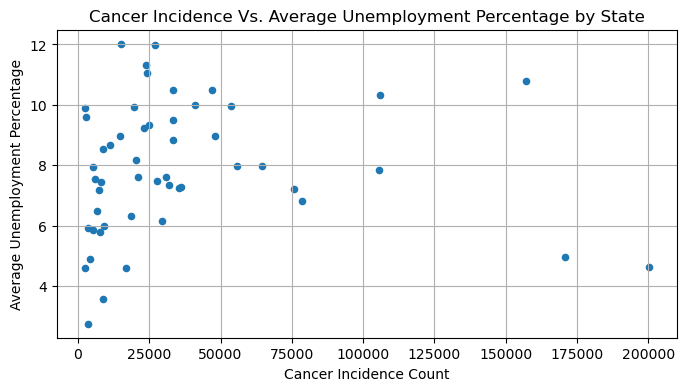

In [10]:
# Create a scatterplot that displays the correlation between the average unemployment percentage and cancer incidence by state
result_df.plot(kind="scatter", x="Cancer Incidence Count", y="Average Unemployment Percentage", grid=True, figsize=(8,4),
              title="Cancer Incidence Vs. Average Unemployment Percentage by State")
plt.show()